In [72]:
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from random import uniform, seed
import seaborn as sns
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
seed(42069)

In [73]:
emip_metadata = pd.read_csv("../../datasets/emip-fixations/metadata/emip_metadata.csv")
cscw_metadata = pd.read_csv("../../datasets/cscw/metadata/CSCW - Sheet1.csv", sep=";")
fractions_metadata = pd.read_csv("../../datasets/fractions/metadata/DataSet_PrePost.csv")

In [74]:
emip_labels = emip_metadata["correct_vehicle"] + emip_metadata["correct_rectangle"]
cscw_labels = cscw_metadata["Posttest.Score"]
fractions_labels = fractions_metadata["Post_SumOfCorrect_NewSum"]

Counter({1: 16, 2: 20, 9: 2, 6: 7, 3: 17, 7: 4, 5: 6, 4: 7, 0: 1, 8: 1})

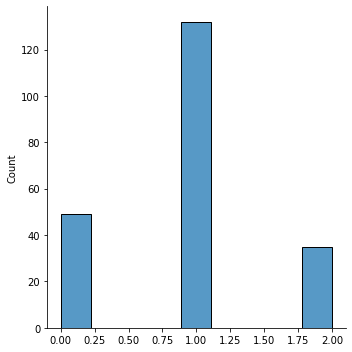

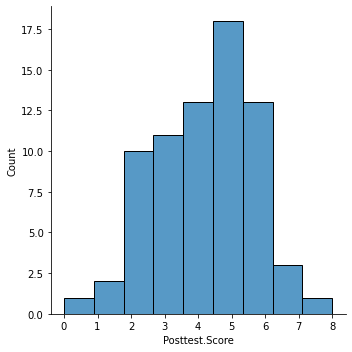

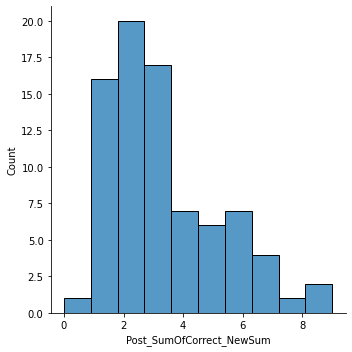

In [75]:
sns.displot(emip_labels)
sns.displot(cscw_labels)
sns.displot(fractions_labels)
Counter(fractions_labels)

In [76]:
sampler = RandomOverSampler(sampling_strategy="all")
a, emip_labels = sampler.fit_resample(emip_metadata, emip_labels)
a, cscw_labels = sampler.fit_resample(cscw_metadata, cscw_labels)
a, fractions_labels = sampler.fit_resample(fractions_metadata, fractions_labels)

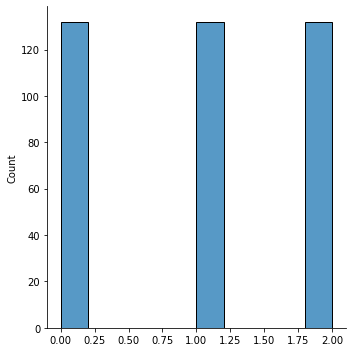

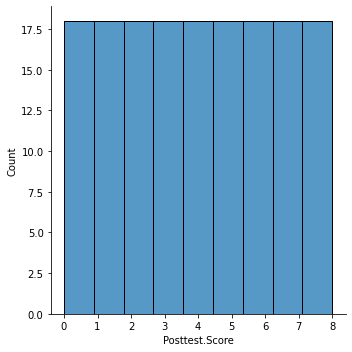

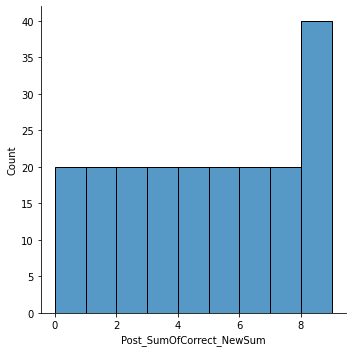

In [77]:
sns.displot(emip_labels)
sns.displot(cscw_labels)
sns.displot(fractions_labels)

In [78]:
emip_labels = (emip_labels-emip_labels.min())/(emip_labels.max()-emip_labels.min())
cscw_labels = (cscw_labels-cscw_labels.min())/(cscw_labels.max()-cscw_labels.min())
fractions_labels = (fractions_labels-fractions_labels.min())/(fractions_labels.max()-fractions_labels.min())


In [79]:
def get_baseline(labels):
    error = labels - labels.mean()
    error_squared = (error**2).mean()
    baseline = math.sqrt(error_squared)
    return baseline

def get_random_normal_prediction(labels):
    prediction = [np.random.normal(loc=labels.mean(), scale=labels.std()) for i in labels]
    rmse_baseline = mean_squared_error(labels, prediction, squared=False)
    return rmse_baseline

def get_random_uniform_prediction(labels):
    prediction = [np.random.uniform(0,1) for i in labels]
    rmse_baseline = mean_squared_error(labels, prediction, squared=False)
    return rmse_baseline

def get_oos_baseline(labels):
    normal_rmses = [get_random_normal_prediction(labels) for i in range(300)]
    avg_normal_rmse= sum(normal_rmses)/len(normal_rmses)
    uniform_rmses = [get_random_uniform_prediction(labels) for i in range(300)]
    avg_uniform_rmse= sum(uniform_rmses)/len(uniform_rmses)
    return (avg_normal_rmse + avg_uniform_rmse)/2

In [80]:
print(get_baseline(cscw_labels), "CSCW baseline")
print(get_baseline(emip_labels), "EMIP baseline")
print(get_baseline(fractions_labels), "Fractions labels")
print(get_baseline(pd.concat((emip_labels, fractions_labels))), "fractions and emip baseline")
print(get_baseline(pd.concat((cscw_labels, fractions_labels))), "fractions and cscw baseline")
print(get_baseline(pd.concat((emip_labels, cscw_labels))), "cscw and emip baseline")
print(get_baseline(pd.concat((emip_labels, cscw_labels, fractions_labels))), "fractions, cscw and emip baseline")

0.3227486121839514 CSCW baseline
0.408248290463863 EMIP baseline
0.3191423692521127 Fractions labels
0.38067929916052207 fractions and emip baseline
0.3207612249852868 fractions and cscw baseline
0.3853848795377734 cscw and emip baseline
0.3690631553349893 fractions, cscw and emip baseline


In [53]:
errors = {
    "cscw": get_baseline(cscw_labels),
    "emip": get_baseline(emip_labels),
    "fractions": get_baseline(fractions_labels),
    "emip_fractions": get_baseline(pd.concat((emip_labels, fractions_labels))),
    "fractions_cscw": get_baseline(pd.concat((cscw_labels, fractions_labels))),
    "emip_cscw": get_baseline(pd.concat((emip_labels, cscw_labels)))
}

In [54]:
errors

{'cscw': 0.3227486121839514,
 'emip': 0.408248290463863,
 'fractions': 0.3191423692521127,
 'emip_fractions': 0.38067929916052207,
 'fractions_cscw': 0.3207612249852868,
 'emip_cscw': 0.3853848795377734}

In [44]:
label_df = pd.DataFrame()
label_df["emip"] = emip_labels
label_df["cscw"] = cscw_labels
label_df["fractions"] = fractions_labels
label_df
label_df["random"] = pd.Series([uniform(0, 1) for i in range(len(cscw_labels))])
sns.kdeplot(label_df)

ValueError: If using all scalar values, you must pass an index

In [1]:
sns.displot(pd.concat((emip_labels, cscw_labels, fractions_labels)), kind="kde")

NameError: name 'sns' is not defined

In [2]:
emip_labels

NameError: name 'emip_labels' is not defined

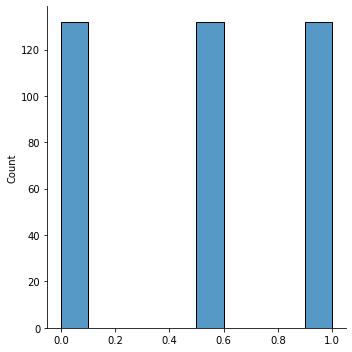

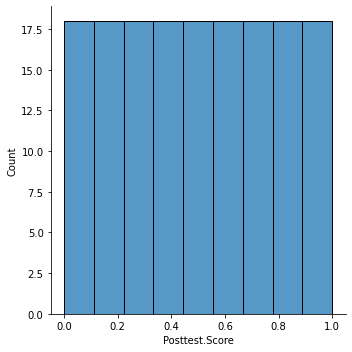

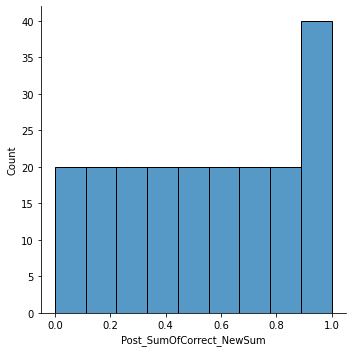

In [55]:
sns.displot(emip_labels)
sns.displot(cscw_labels)
sns.displot(fractions_labels)